# Electrode Demo: 
This demo uses opencv to process the images.
I analyze the electrode images in two steps: first to find the area of the circle (the scope), and then to find the area of the molten steel. The first step can be done with Hough Circles or findContour, and the second step is done with inRange and findContour.

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'edges Threshold')

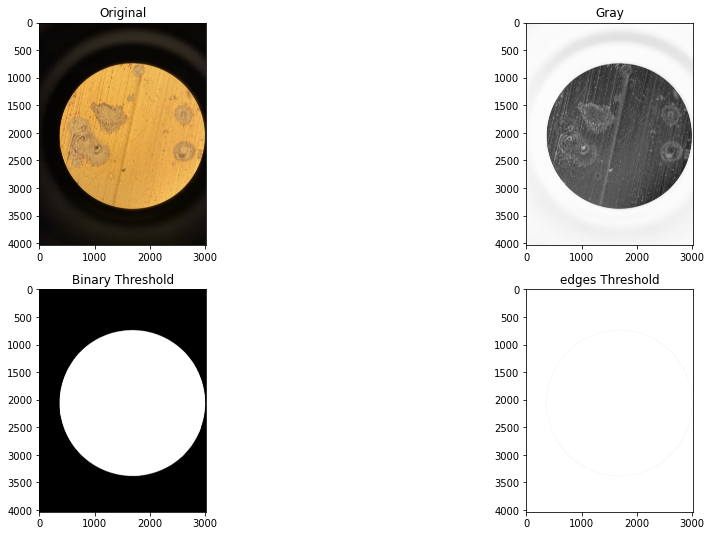

In [14]:
src = cv2.imread('Gold Set 2/y0_x2.JPG')
original = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(imgray,55,255,cv2.THRESH_BINARY_INV)
alpha = cv2.GaussianBlur(alpha, (21,21), cv2.BORDER_DEFAULT)
edges = cv2.Canny(alpha, 84, 255)


rows = 2
columns = 2
fig = plt.figure(figsize=(16,9))
fig.add_subplot(rows, columns, 1)
plt.imshow(original)
plt.title("Original")
fig.add_subplot(rows, columns, 2)
plt.imshow(imgray, cmap='Greys')
plt.title("Gray")
fig.add_subplot(rows, columns, 3)
plt.imshow(alpha, cmap='Greys')
plt.title("Binary Threshold")
fig.add_subplot(rows, columns, 4)
plt.imshow(edges, cmap='Greys')
plt.title("edges Threshold")



In [12]:
circle = cv2.HoughCircles(alpha, cv2.HOUGH_GRADIENT, 1.5, 100)
print('I have found ' + str(len(circle)) + ' circle(s).')
roundcircle = np.round(circle[0, 0,:])
(x,y) = (int(roundcircle[0]), int(roundcircle[1]))
r = int(roundcircle[2])
circlearea = np.pi*r**2
print('Center at (' + str(x) +', '+ str(y) + ')')
print('Radius = '+str(r))
print('Circle Area = ' + str(circlearea))

I have found 1 circle(s).
Center at (1690, 2060)
Radius = 1316
Circle Area = 5440786.086675405


[[[-1 -1  1 -1]
  [-1 -1 -1  0]]]


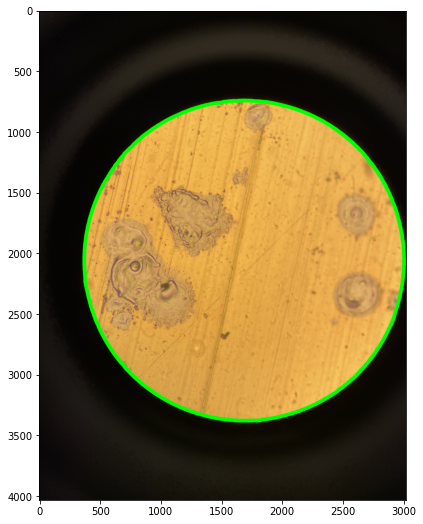

In [21]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, 1)
rep = cv2.drawContours(original, contours, 0, (0,255,0), 10)
fig = plt.figure(figsize=(16,9))
plt.imshow(original)

In [ ]:
circlemask = np.zeros(original.shape, dtype=np.uint8)
cv2.circle(circlemask, (x,y), r, (255,255,255), -1)
circlemask = cv2.cvtColor(circlemask,cv2.COLOR_BGR2GRAY)
ROI = cv2.bitwise_and(original,original, mask=circlemask)

In [ ]:
rows = 1
columns = 4
fig = plt.figure(figsize=(16,9))
fig.add_subplot(rows, columns, 1)
plt.imshow(ROI)
plt.title("ROI")

hsvimage = cv2.cvtColor(ROI, cv2.COLOR_RGB2HSV)
lower = np.array([15, 115, 200], dtype="uint8")
upper = np.array([76, 200, 250], dtype="uint8")
goldmask = cv2.inRange(hsvimage, lower, upper)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(goldmask, cv2.MORPH_OPEN, kernel, iterations=1)

cnts = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
area = 0
for c in cnts:
    currcontour = cv2.contourArea(c)
    if currcontour >= 500:
        area += currcontour
        cv2.drawContours(ROI,[c], 0, (0,0,255), 2)
print('The contour area is ' + str(area))

fig.add_subplot(rows, columns, 2)
plt.imshow(goldmask, cmap='Greys')
plt.title("Gold Mask")
fig.add_subplot(rows, columns, 3)
plt.imshow(opening, cmap='Greys')
plt.title("Processed")
fig.add_subplot(rows, columns, 4)
plt.imshow(ROI)
plt.title("ROI Contour")

In [ ]:
fig = plt.figure(figsize=(16,9))
cv2.circle(ROI, (x,y),r,(0,255,0), 5)
plt.imshow(ROI)

In [ ]:
#Calculating Area:
number_of_black_pix = np.sum(opening == 0)      # extracting only black pixels
print('Number of black pixels: ' + str(number_of_black_pix))
perarea = area/circlearea
print('Contour area/Circle area = '+ str(area)+'/'+ str(circlearea)+' = ' +str(perarea))

In [ ]:
hsvalue = cv2.cvtColor(np.uint8([[[218,160,75]]]),cv2.COLOR_RGB2HSV)
print(str(hsvalue))